In [1]:
import sys
import pandas
import numpy
import sklearn
import matplotlib

print ('Python : {}'.format(sys.version))
print ('Numpy : {}'.format(numpy.__version__))
print ('pandas : {}'.format(pandas.__version__))
print ('matplotlib : {}'.format(matplotlib.__version__))
print ('sklearn : {}'.format(sklearn.__version__))

Python : 2.7.16 |Anaconda, Inc.| (default, Sep 24 2019, 16:55:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy : 1.16.5
pandas : 0.24.2
matplotlib : 2.2.3
sklearn : 0.20.3


In [27]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [7]:
#importing data
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size'
      ,'bare_nuclei','bland_chromatin','normal_neucloli','mitosis','class']
df=pd.read_csv(url,names=names)


In [10]:
#Pre processing 
df.replace('?',-99999,inplace=True)
print(df.axes)
df.drop(['id'],1,inplace=True)
#print shape of dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index([u'id', u'clump_thickness', u'uniform_cell_size', u'uniform_cell_shape',
       u'marginal_adhesion', u'single_epithelial_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_neucloli', u'mitosis', u'class'],
      dtype='object')]
(699, 10)


In [19]:
#data visualization
print(df.loc[555])
print (df.describe())

clump_thickness           4
uniform_cell_size         3
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           4
normal_neucloli           8
mitosis                   1
class                     2
Name: 555, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              69

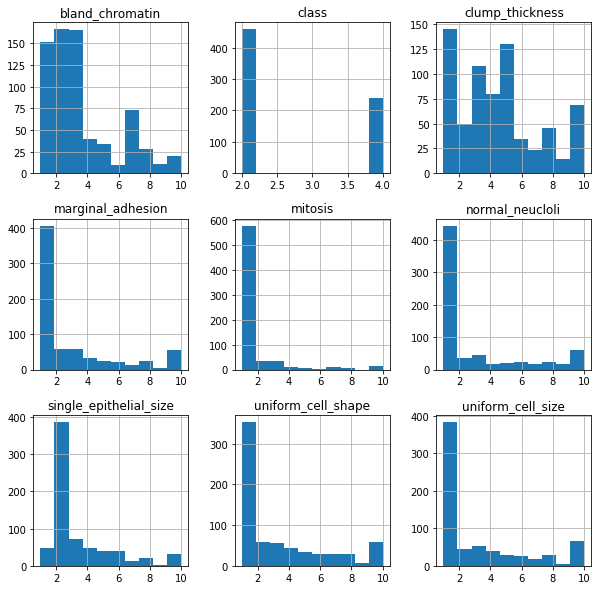

In [18]:
#Plot graphs
df.hist(figsize=(10,10))
plt.show()

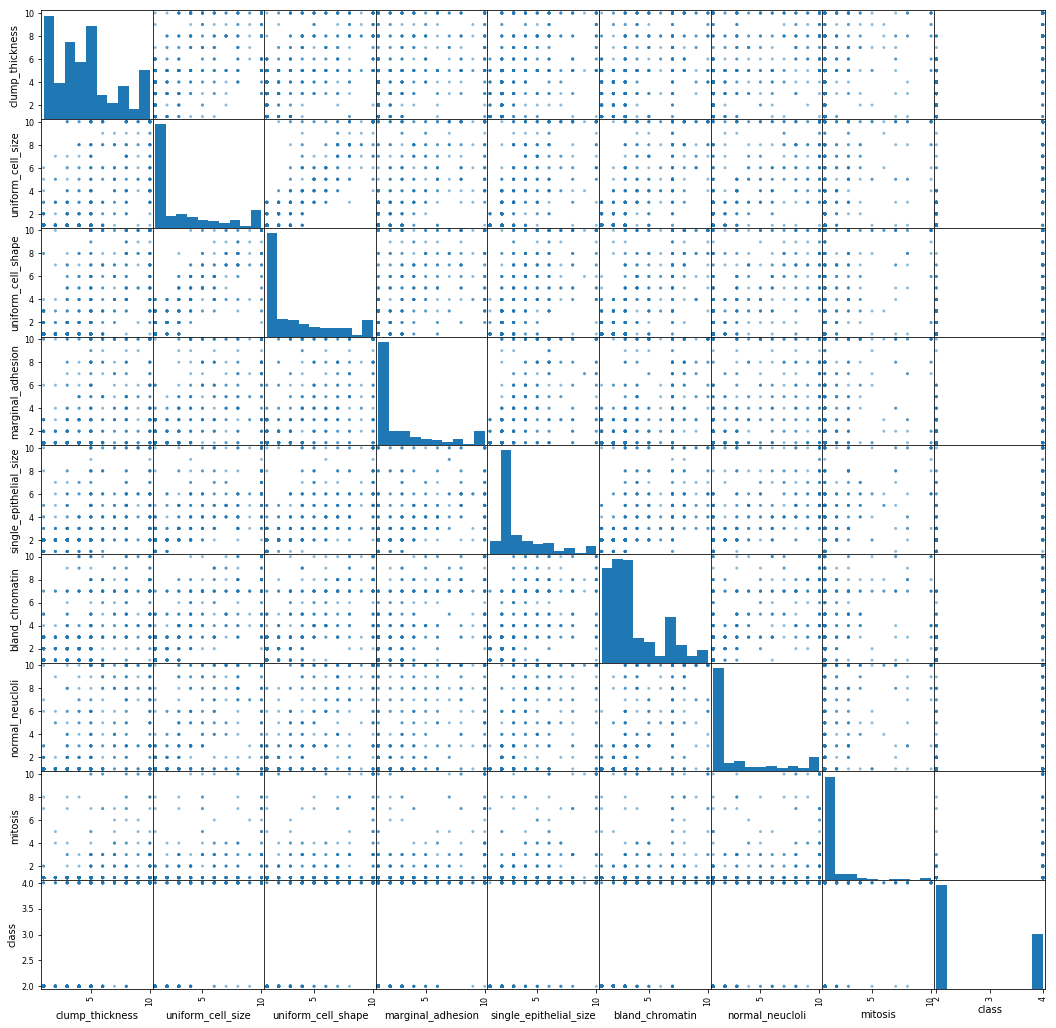

In [20]:
#create scatter plot
scatter_matrix(df,figsize=(18,18))
plt.show()

In [28]:
#create x y datasets for training
X=np.array(df.drop(['class'],1))
y=np.array(df['class'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [29]:
#specify testing options
seed='8'
scoring='accuracy'

In [40]:
#define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))


In [42]:
#Evaluate
results = []
names = []

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg='%s : %f (%f)'%(name,cv_results.mean(),cv_results.std())
    print (msg)


KNN : 0.966006 (0.014842)
SVM : 0.957078 (0.022849)


/opt/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
#making predictions
for name,model in models:
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       0.98      0.99      0.98        92
           4       0.98      0.96      0.97        48

   micro avg       0.98      0.98      0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM
0.9714285714285714
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        92
           4       0.92      1.00      0.96        48

   micro avg       0.97      0.97      0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140



In [45]:
clf=SVC()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

example=np.array([[4,2,1,1,1,2,3,2,10]])
example=example.reshape(len(example),-1)
prediction=clf.predict(example)
print(prediction)

0.9714285714285714
[4]
